In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
# Import utilites
from id_card_detector.utils import label_map_util
from id_card_detector.utils import visualization_utils as vis_util
import imutils

In [3]:
%matplotlib inline
from matplotlib               import pyplot as plt

def plotThis(img):	  
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    return      


In [4]:
# Name of the directory containing the object detection module we're using
MODEL_NAME = 'model'
# IMAGE_NAME = 'test_images/buletin.jpg'
IMAGE_NAME = 'test_images/image.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,'id_card_detector',MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'id_card_detector','data','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 1

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

W0110 19:47:49.476116 140433667266368 module_wrapper.py:139] From /home/trial/Master/COMPUTER_VISION-DR.P.RADU/romanian-id-detector/id_card_detector/utils/label_map_util.py:132: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



In [5]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)
    

In [6]:
# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [7]:
# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image=imutils.resize(image, width=800)
image_expanded = np.expand_dims(image, axis=0)

In [8]:
# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

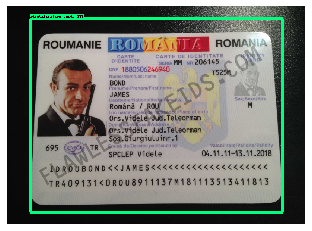

In [9]:
_,boxes2=vis_util.visualize_boxes_and_labels_on_image_array2(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
plotThis(image)

In [10]:
ymin, xmin, ymax, xmax = list(boxes2)[0]
im_height, im_width = image.shape[:2]
addp=0.125
(left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                              ymin * im_height, ymax * im_height)
w=np.abs(right-left)
h=np.abs(bottom-top)
addp=min(w*addp,h*addp)
left=max(left-addp,0)
top=max(top-addp,0)
right=min(right+addp,im_width)
bottom=min(bottom+addp,im_height)
print(left, right, top, bottom)

0 800 0 584


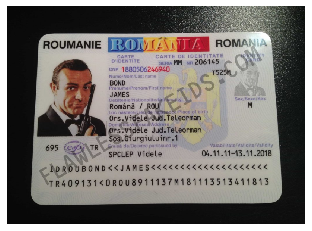

In [11]:
image = cv2.imread(PATH_TO_IMAGE)
image=imutils.resize(image, width=800)
buletin=image[int(top):int(bottom),int(left):int(right),:]
plotThis(buletin)
# buletin = cv2.imread(PATH_TO_IMAGE)

In [12]:
'''
lower_red = np.array([110,50,50]) 
upper_red = np.array([130,255,255]) 
buletin_coppy=buletin.copy()
hsv = cv2.cvtColor(buletin_coppy, cv2.COLOR_BGR2HSV) 
mask = cv2.inRange(hsv, lower_red, upper_red)
buletin=cv2.bitwise_and(buletin, buletin, mask = mask)
plotThis(buletin)
'''

'\nlower_red = np.array([110,50,50]) \nupper_red = np.array([130,255,255]) \nbuletin_coppy=buletin.copy()\nhsv = cv2.cvtColor(buletin_coppy, cv2.COLOR_BGR2HSV) \nmask = cv2.inRange(hsv, lower_red, upper_red)\nbuletin=cv2.bitwise_and(buletin, buletin, mask = mask)\nplotThis(buletin)\n'

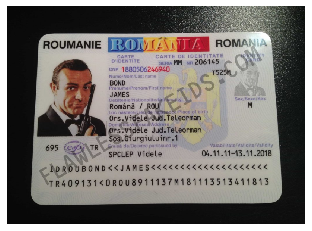

In [13]:
lower_gray = np.array([0, 5, 50], np.uint8)
upper_gray = np.array([179, 50, 255], np.uint8)
buletin_coppy=buletin.copy()
hsv = cv2.cvtColor(buletin_coppy, cv2.COLOR_BGR2HSV) 
mask = cv2.inRange(hsv, lower_gray, upper_gray)
# buletin_coppy=cv2.bitwise_and(buletin_coppy, buletin_coppy, mask = mask)
plotThis(buletin_coppy)

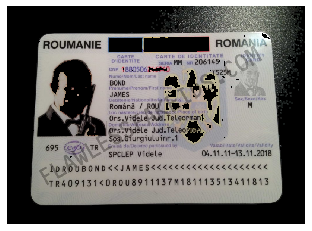

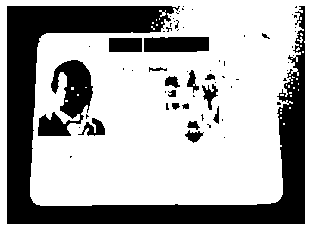

In [14]:
dilatation_size = 2
element = cv2.getStructuringElement(cv2.MORPH_RECT, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size, dilatation_size))
mask = cv2.dilate(mask, element)
buletin_coppy=buletin.copy()
buletin_coppy=cv2.bitwise_and(buletin_coppy, buletin_coppy, mask = mask)
plotThis(buletin_coppy)
plotThis(mask)

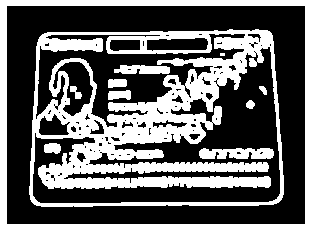

292


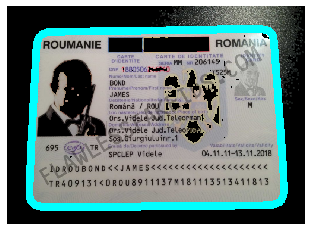

In [15]:
buletin_grey= cv2.cvtColor(buletin_coppy,cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.float32)/25
gray = cv2.filter2D(buletin_grey,-1,kernel)
gray = cv2.blur(gray,(10,10))  
edges = cv2.Canny(gray,600,700,apertureSize = 5)
dilatation_size = 4
element = cv2.getStructuringElement(cv2.MORPH_RECT, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size, dilatation_size))
edges = cv2.dilate(edges, element)

contours, hier = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plotThis(edges)
# contours, hier = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hull =None
maxCA=0
for c in contours:
    # get the bounding rect
    # x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    # cv2.rectangle(buletin_coppy, (x, y), (x+w, y+h), (0, 255, 0), 20)
    #print(w,h)
    # get the min area rect
    # rect = cv2.minAreaRect(c)
    # box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    # box = np.int0(box)
    # draw a red 'nghien' rectangle
    # cv2.drawContours(buletin_coppy, [box], -1, (0, 0, 255),20)
    ca=cv2.contourArea(c)
    if ca>maxCA:
        hull=cv2.convexHull(c, False)
        maxCA=ca
    

print(len(contours[0]))
cv2.drawContours(buletin_coppy, [hull], -1, (255, 255, 0), 20,8)
# cv2.drawContours(buletin_coppy, contours, -1, (255, 255, 0), 20,8)
plotThis(buletin_coppy)

In [16]:
def simplify_contour(contour, n_corners=4):
    '''
    Binary searches best `epsilon` value to force contour 
        approximation contain exactly `n_corners` points.

    :param contour: OpenCV2 contour.
    :param n_corners: Number of corners (points) the contour must contain.

    :returns: Simplified contour in successful case. Otherwise returns initial contour.
    '''
    n_iter, max_iter = 0, 100
    lb, ub = 0., 1.

    while True:
        n_iter += 1
        if n_iter > max_iter:
            return contour

        k = (lb + ub)/2.
        eps = k*cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, eps, True)

        if len(approx) > n_corners:
            lb = (lb + ub)/2.
        elif len(approx) < n_corners:
            ub = (lb + ub)/2.
        else:
            return approx

[[[737 518]]

 [[ 75 533]]

 [[ 86  83]]

 [[703  66]]]


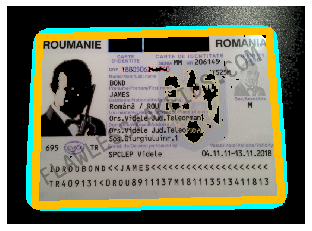

In [17]:
approx = simplify_contour(hull)
print(approx)
cv2.drawContours(buletin_coppy,[approx],0,(0,191,255),20)
plotThis(buletin_coppy)

[[737. 518.]
 [ 75. 533.]
 [ 86.  83.]
 [703.  66.]]
[[ 86.  83.]
 [703.  66.]
 [737. 518.]
 [ 75. 533.]]


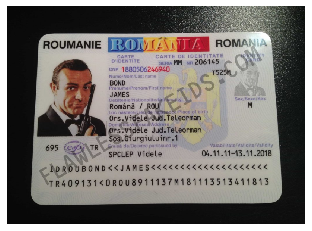

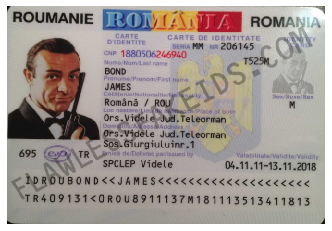

In [18]:
from scipy.spatial import distance as dist
 
def order_points(pts):
	# sort the points based on their x-coordinates
	xSorted = pts[np.argsort(pts[:, 0]), :]
 
	# grab the left-most and right-most points from the sorted
	# x-roodinate points
	leftMost = xSorted[:2, :]
	rightMost = xSorted[2:, :]
 
	# now, sort the left-most coordinates according to their
	# y-coordinates so we can grab the top-left and bottom-left
	# points, respectively
	leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
	(tl, bl) = leftMost
 
	# now that we have the top-left coordinate, use it as an
	# anchor to calculate the Euclidean distance between the
	# top-left and right-most points; by the Pythagorean
	# theorem, the point with the largest distance will be
	# our bottom-right point
	D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
	(br, tr) = rightMost[np.argsort(D)[::-1], :]
 
	# return the coordinates in top-left, top-right,
	# bottom-right, and bottom-left order
	return np.array([tl, tr, br, bl], dtype="float32")
def four_point_transform(image, pts):
    pts=np.array(pts, dtype = "float32")
    rect=pts.reshape((4,2))
    print(rect)
    rect=order_points(rect)
    print(rect)
    #rect = order_points(pts)
    (tl, tr, br, bl) = rect
 
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
 
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
 
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
 
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
    # return the warped image
    return warped
new_img = four_point_transform(buletin,approx)
plotThis(buletin)
plotThis(new_img)